#Proyecto 2 - Modelado Optimización y Simulación

## Importación de librerias

In [1]:
# Para manejar los grafos
import networkx as nx
# Para manejar los geoJson
import geopandas as gpd
from shapely.geometry import Point, MultiPolygon

## Lectura de archivo de la malla vial de Bogotá

In [2]:
gdf = gpd.read_file('MallaBogota.geojson')

A continuación veremos una pequeña muestra de los datos que encontramos de la malla vial, en concreto nos interesan las coordenadas puesto que estas representan intersecciones, como son de tipo 'LineString' lo que veremos es que cada fila representa una calle de la ciudad. 

In [3]:
gdf.head(10)

,OBJECTID,MVICCALZAD,MVICCAT,MVITIPO,MVINOMBRE,MVINALTERN,MVINPRINCI,MVINGENERA,MVINANTIGU,MVIETIQUET,...,MVITSUP,MVIMONIT,MVICODIGO,CREADOR,CREADOR_DATE,EDITOR,EDITOR_DATE,MVI_VELREG,Shape__Length,geometry
0,1,168175.0,18005353,KR,,,008A0000E0,05700000S0,KR 14A E,KR 8A E,...,2,0,96282,None,NaT,SIGADMIN,2014-01-22 19:06:43+00:00,30.0,0.000320,"LINESTRING (-74.09821 4.53521, -74.09846 4.53500)"
1,2,34104.0,8001090,CL,,,04200000S0,0980000000,CL 42 S,CL 42 S,...,6,0,62558,None,NaT,SIGADMIN,2014-01-22 17:48:21+00:00,30.0,0.000233,"LINESTRING (-74.17653 4.64671, -74.17666 4.64690)"
2,3,34338.0,2000900,TV,,,00600000E0,0970000000,TV 6 E,TV 6 E,...,1,0,33964,None,NaT,SIGADMIN,2014-01-22 18:52:11+00:00,NaN,0.000862,"LINESTRING (-74.02180 4.66853, -74.02161 4.66937)"
3,4,3192.0,1000290,CL,,,183B000000,0080000000,CL 183B,CL 183B,...,6,0,29147,None,NaT,SIGADMIN,2014-01-22 19:20:55+00:00,30.0,0.001055,"LINESTRING (-74.02901 4.76098, -74.02910 4.760..."
4,5,33331.0,8001681,KR,,,0810000000,008A000000,KR 84D,KR 81,...,12,0,133742,None,NaT,SIGADMIN,2014-01-22 18:26:11+00:00,30.0,0.000533,"LINESTRING (-74.14690 4.64391, -74.14651 4.64427)"
5,6,135781.0,19001473,CL,,,0630BIS0S0,075A000000,CL 63BIS S,CL 63BIS S,...,12,0,109127,None,NaT,SIGADMIN,2014-01-22 19:07:23+00:00,30.0,0.000069,"LINESTRING (-74.17558 4.58640, -74.17564 4.58639)"
6,7,NaN,4004372,KR,,,007A0000E0,04200000S0,KR 7A E,KR 7A E,...,12,0,121922,None,NaT,SIGADMIN,2014-01-22 17:14:04+00:00,30.0,0.000584,"LINESTRING (-74.08996 4.54753, -74.09015 4.54698)"
7,8,139545.0,8004308,AK,AVENIDA DEL CONGRESO EUCARISTICO,,0680000000,0100000000,AK 68,AK 68,...,12,0,12978,None,NaT,SIGADMIN,2014-01-22 18:25:35+00:00,60.0,0.002061,"LINESTRING (-74.12113 4.63247, -74.12034 4.63437)"
8,9,231456.0,8007913,TV,,,073F000000,039C0000S0,TV 75,TV 73F,...,1,0,85361,None,NaT,SIGADMIN,2014-01-22 18:11:56+00:00,30.0,0.000490,"LINESTRING (-74.15248 4.61816, -74.15297 4.61809)"
9,10,4410.0,1005528,AK,AVENIDA PASEO DE LOS LIBERTADORES,AUTOPISTA NORTE,0450000000,1680000000,AK 13,AK 45,...,12,0,4545,None,NaT,SIGADMIN,2014-01-22 17:45:14+00:00,60.0,0.000466,"LINESTRING (-74.04652 4.74930, -74.04656 4.74977)"


## Lectura del archivo de índices de seguridad en Bogotá

In [4]:
poligonos = gpd.read_file('DAILoc.geojson')

A continuación verémos una pequeña muestra de los polígonos, las variables que nos interesan son las que tienen el conteo de ciertos delitos en específico que pueden afectar las estadísticas de seguridad en Bogotá, estas son: 

- Total Hurto Celulares Año Actual
- Total Hurto Bicicletas Año Actual
- Total Hurto Personas 

Que están representadas en las variables respectivamente: 

- CMHCE20CON
- CMHB21CONT
- CMHP2OCONT

Estas variables son variables numéricas que representan la cantidad de delitos reportados en la localidad representada en el polígono mas recientes que encontramos en la fuente de datos. Siendo estas del año 2020, 2021 y 2020 respectivamente.



In [5]:
columnasDeseadas = ['CMNOMLOCAL', 'CMIULOCAL' ,'CMHCE20CON','CMHB21CONT','CMHP20CONT']

In [6]:
poligonos[columnasDeseadas]

,CMNOMLOCAL,CMIULOCAL,CMHCE20CON,CMHB21CONT,CMHP20CONT
0,Fontibón,09,3136.0,672.0,5305.0
1,Chapinero,02,3292.0,285.0,5369.0
2,Sumapaz,20,0.0,0.0,2.0
3,Rafael Uribe Uribe,18,1950.0,217.0,2990.0
4,Candelaria,17,419.0,37.0,781.0
5,Barrios Unidos,12,1981.0,435.0,3279.0
6,Teusaquillo,13,2313.0,477.0,3931.0
7,Puente Aranda,16,2622.0,413.0,4257.0
8,Los Mártires,14,1968.0,270.0,3362.0
9,Usaquén,01,3499.0,545.0,6144.0


## Manejo de los datos de seguridad en Bogotá


Vamos a crear una columnca calculada que muestre el total de delitos de estos tres tipos en cada localidad

In [7]:
columnasASumar = ['CMHCE20CON','CMHB21CONT','CMHP20CONT']

In [8]:
sumas = []
for index, row in poligonos.iterrows():
    suma = 0
    for columna in columnasASumar:
        suma += int(row[columna])
    sumas.append(suma)
# Agregar la nueva columna
poligonos['TotalDelitos'] = sumas

    

Ya que tenemos las columnas deseadas podemos ver ahora qué valor de delincuencia tiene cada nodo:

In [9]:
columnasAMostrar = ['CMNOMLOCAL', 'CMIULOCAL', 'TotalDelitos']
poligonos[columnasAMostrar]

,CMNOMLOCAL,CMIULOCAL,TotalDelitos
0,Fontibón,09,9113
1,Chapinero,02,8946
2,Sumapaz,20,2
3,Rafael Uribe Uribe,18,5157
4,Candelaria,17,1237
5,Barrios Unidos,12,5695
6,Teusaquillo,13,6721
7,Puente Aranda,16,7292
8,Los Mártires,14,5600
9,Usaquén,01,10188


## Creación del grafo

Para crear el grafo vamos a colocar números aleatorios entre 2 y 16205 (rango de delitos para cada localidad) para darle una primera aproximación al modelo, debido a que por las limitaciones de los datos no es posible saber a qué localidad pertenece cada punto.

In [10]:
import random
G = nx.Graph()

puntos = []
for index, row in gdf.iterrows():
    geometry = row['geometry']
    nodes = list(geometry.coords)
    for i in range(len(nodes) - 1):
        G.add_edge(nodes[i], nodes[i+1], weight=random.randint(2, 16205))


In [11]:
# Tamaño del grafo (número de nodos)
size = len(G)
print("Número de nodos:", size)

# Tamaño del grafo (número de aristas)
edges = G.number_of_edges()
print("Número de aristas:", edges)

Número de nodos: 228419
Número de aristas: 273397


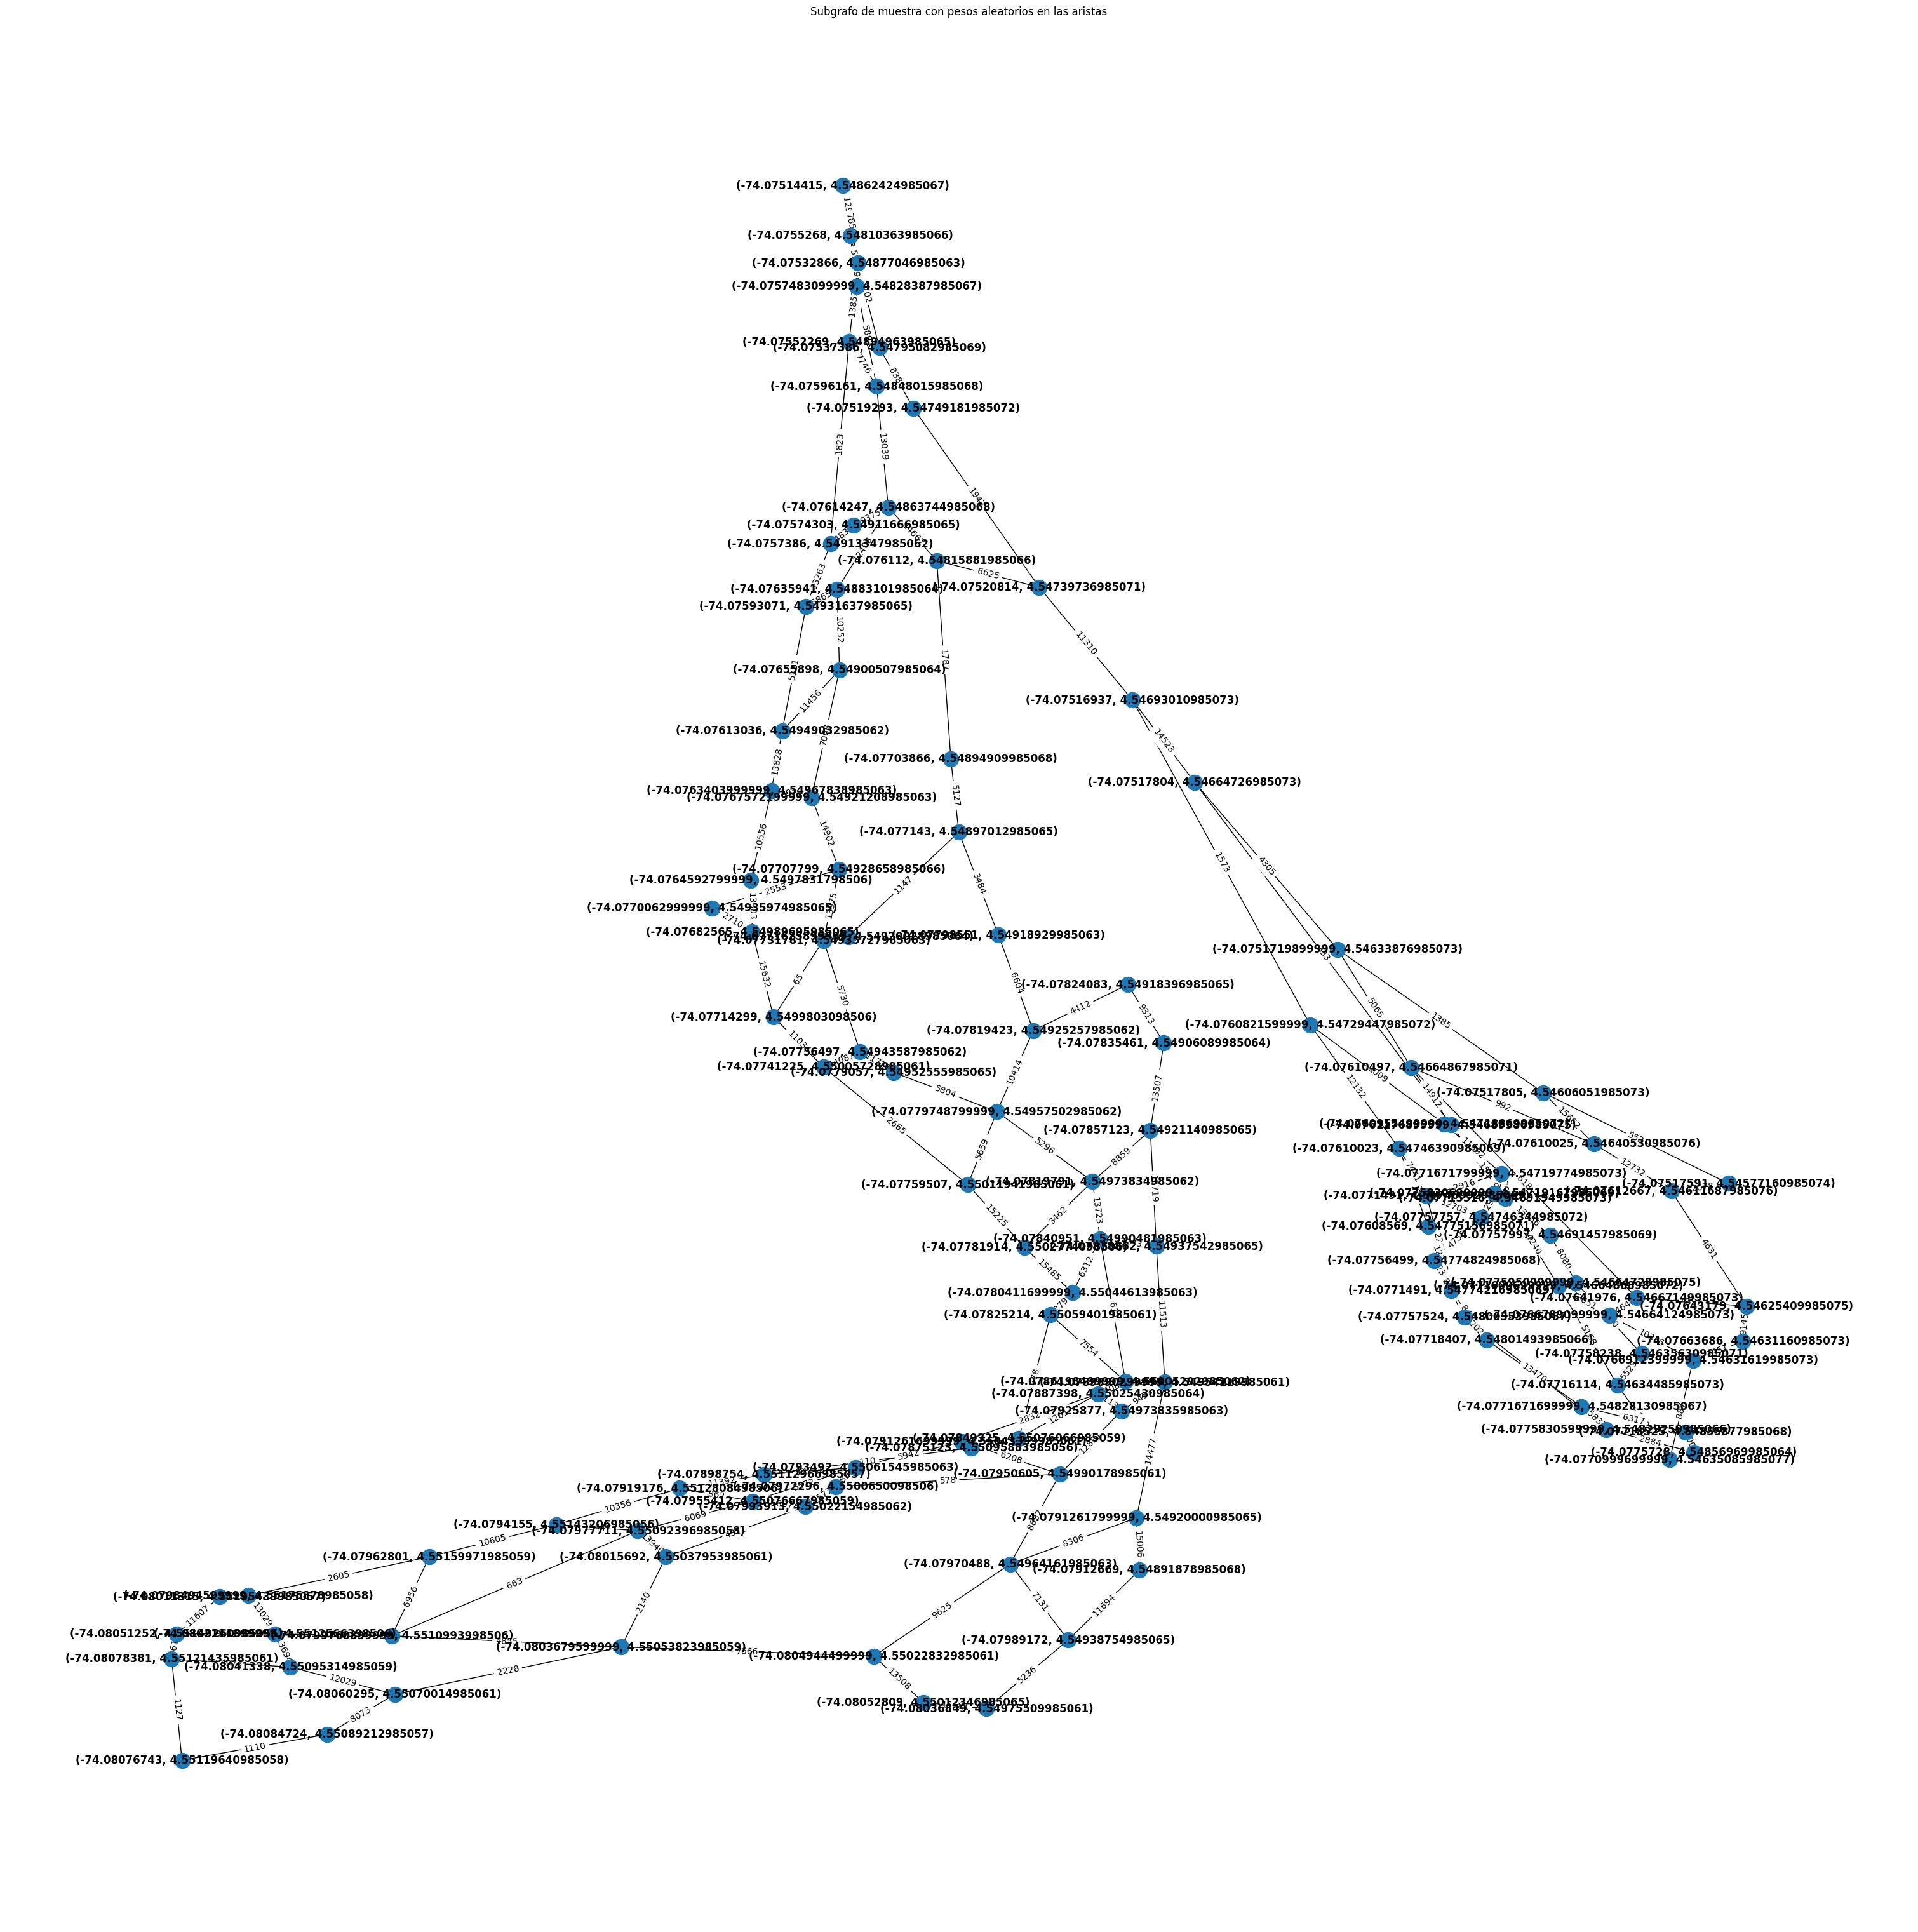

In [12]:
import matplotlib.pyplot as plt
# Obtener las componentes conectadas del grafo
connected_components = list(nx.connected_components(G))

# Seleccionar una componente conectada al azar como muestra
sample_component = connected_components[1]

# Crear un subgrafo a partir de la muestra
sample_subgraph = G.subgraph(sample_component)

# Dibujar el subgrafo de muestra
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(sample_subgraph)
nx.draw(sample_subgraph, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(sample_subgraph, pos, edge_labels={(u, v): sample_subgraph[u][v]['weight'] for u, v in sample_subgraph.edges})
plt.title("Subgrafo de muestra con pesos aleatorios en las aristas")
plt.show()

In [13]:
# Tamaño del grafo (número de nodos)
size = len(sample_subgraph)
print("Número de nodos:", size)

# Tamaño del grafo (número de aristas)
edges = sample_subgraph.number_of_edges()
print("Número de aristas:", edges)

Número de nodos: 117
Número de aristas: 175


# Modelado y optimización

Creamos un grafo nuevo basado en el subgrafo para probar el modelo

In [15]:
# Crear un nuevo grafo
grafo = nx.Graph()

# Agregar nodos con sus posiciones
nodos_dict = {}
i=1
for node in sample_subgraph.nodes():
    nodos_dict.update({node: i})
    grafo.add_node(i, pos=node)
    i += 1

# Agregar bordes con sus pesos
# Agregar bordes con sus pesos
for edge in sample_subgraph.edges():
    # Obtener el índice de los nodos en el nuevo grafo
    node1_index = nodos_dict[edge[0]]
    node2_index = nodos_dict[edge[1]]
    weight = sample_subgraph[edge[0]][edge[1]]['weight']
    grafo.add_edge(node1_index, node2_index, weight=weight)

Creamos el modelo basándonos en los trabajos del laboratorio, se tendría que modificar el origen y destino con el nodo y origen que busquemos en el diccionario.

In [16]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

nodos = grafo.nodes()
enlaces = grafo.edges()


#Creaci�n Modelo--------------------------------------------------------------
Model = ConcreteModel()

#sets & parameters------------------------------------------------------------
numNodes = len(grafo.nodes())
Model.N=RangeSet(1,numNodes)

#costos-----------------------------------------------------------------------
Model.c =Param(Model.N, Model.N, mutable=True)

            



for i in Model.N:
    for j in Model.N:
                Model.c[i,j] = 999


for i,j in grafo.edges():
    print(i,j, grafo.edges()[(i, j)]['weight'])
    Model.c[i,j] = 1

#origen y destino-----------------------------------------------------------------------
        
s = 3
d = 5
        

#variables--------------------------------------------------------------------
            
#Variable binaria que indica si el enlace (i,j) es seleccionado para hacer parte 
#del camino que va del nodo fuente al nodo destino.
Model.x = Var(Model.N,Model.N, domain=Binary)


# # OBJECTIVE FUNCTIONS*************************************************************


#Funci�n de costos
Model.f2 = sum(Model.x[i,j] * Model.c[i,j] for i in Model.N for j in Model.N)


#Proceso para ejecutar varias veces el modelo matem�tico con el fin de aplicar el
#m�todo de Smas Ponderadas.


    
#Funci�n objetivo general
Model.O_z = Objective(expr= Model.f2, sense=minimize)
    

##Restricci�n nodo origen
def source_rule(Model,i):
    if i==s:
        return sum(Model.x[i,j] for j in Model.N)==1
    else:
        return Constraint.Skip

Model.source=Constraint(Model.N, rule=source_rule)
    
#Restricci�n nodo destino
def destination_rule(Model,j):
    if j==d:
        return sum(Model.x[i,j] for i in Model.N)==1
    else:
        return Constraint.Skip

Model.destination=Constraint(Model.N, rule=destination_rule)

#Restricci�n nodo intermedio
def intermediate_rule(Model,i):
    if i!=s and i!=d:
        return sum(Model.x[i,j] for j in Model.N) - sum(Model.x[j,i] for j in Model.N)==0
    else:
        return Constraint.Skip

Model.intermediate=Constraint(Model.N, rule=intermediate_rule)

SolverFactory('glpk').solve(Model)

for i in Model.N:
        for j in Model.N:
            if value(Model.x[i,j]) == 1:
                print(i,j)
print(value(Model.c[s,d]))

#Model.display()

ModuleNotFoundError: No module named 'pyomo'